In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from nets import *
from cfgs import *
from data import *
from clip_ops.clip_ops import *
from trainer import *

In [2]:
%matplotlib inline
save_plot = True
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
D = 501

x = np.linspace(0, 1.0, D)
X_tst = np.stack([v.flatten() for v in np.meshgrid(x,x)], axis = -1)
X_tst = np.expand_dims(X_tst, 1)
X_tst[:,:,0] = X_tst[:,:,0] * 12.0 + 4.0
X_tst[:,:,1] = X_tst[:,:,1] * 3.0 + 4.0
print(X_tst.shape)

cfg = additive_1x2_uniform_416_47_config.cfg
cfg.test.num_misreports = 1
cfg.test.gd_iter = 0
cfg.test.batch_size = D
cfg.test.num_batches = int(X_tst.shape[0]/cfg.test.batch_size)
cfg.test.save_output = True

(251001, 1, 2)


In [3]:
Net = additive_net.Net
Generator = uniform_416_47_generator.Generator
clip_op_lambda = (lambda x: clip_op_416_47(x))
Trainer = trainer.Trainer

In [4]:
net = Net(cfg)
generator = Generator(cfg, 'test', X_tst)
clip_op_lambda = (lambda x: tf.assign(x, tf.clip_by_value(x, 0.0, 1.0)))
m = Trainer(cfg, "test", net, clip_op_lambda)
m.test(generator)

INFO:tensorflow:Restoring parameters from experiments/additive_1x2_uniform_416_47/model-400000


2019-02-26 22:45:11,058:INFO:Restoring parameters from experiments/additive_1x2_uniform_416_47/model-400000
2019-02-26 22:45:14,846:INFO:TEST BATCH-0: t = 3.7492, Revenue: 8.035849, Regret: 0.000000, IRP: 0.000000
2019-02-26 22:45:14,855:INFO:TEST BATCH-1: t = 3.7540, Revenue: 8.042937, Regret: 0.000000, IRP: 0.000000
2019-02-26 22:45:14,863:INFO:TEST BATCH-2: t = 3.7585, Revenue: 8.050026, Regret: 0.000001, IRP: 0.000000
2019-02-26 22:45:14,871:INFO:TEST BATCH-3: t = 3.7628, Revenue: 8.057112, Regret: 0.000001, IRP: 0.000000
2019-02-26 22:45:14,878:INFO:TEST BATCH-4: t = 3.7669, Revenue: 8.064195, Regret: 0.000000, IRP: 0.000000
2019-02-26 22:45:14,885:INFO:TEST BATCH-5: t = 3.7709, Revenue: 8.071276, Regret: 0.000001, IRP: 0.000000
2019-02-26 22:45:14,892:INFO:TEST BATCH-6: t = 3.7748, Revenue: 8.078354, Regret: 0.000000, IRP: 0.000000
2019-02-26 22:45:14,899:INFO:TEST BATCH-7: t = 3.7787, Revenue: 8.085431, Regret: 0.000000, IRP: 0.000000
2019-02-26 22:45:14,905:INFO:TEST BATCH-8: t

2019-02-26 22:45:15,386:INFO:TEST BATCH-76: t = 4.0650, Revenue: 8.576874, Regret: 0.000002, IRP: 0.000000
2019-02-26 22:45:15,394:INFO:TEST BATCH-77: t = 4.0701, Revenue: 8.584148, Regret: 0.000001, IRP: 0.000000
2019-02-26 22:45:15,401:INFO:TEST BATCH-78: t = 4.0742, Revenue: 8.591428, Regret: 0.000000, IRP: 0.000000
2019-02-26 22:45:15,408:INFO:TEST BATCH-79: t = 4.0784, Revenue: 8.598715, Regret: 0.000002, IRP: 0.000000
2019-02-26 22:45:15,414:INFO:TEST BATCH-80: t = 4.0825, Revenue: 8.606008, Regret: 0.000000, IRP: 0.000000
2019-02-26 22:45:15,421:INFO:TEST BATCH-81: t = 4.0867, Revenue: 8.613309, Regret: 0.000004, IRP: 0.000000
2019-02-26 22:45:15,429:INFO:TEST BATCH-82: t = 4.0917, Revenue: 8.620616, Regret: 0.000003, IRP: 0.000000
2019-02-26 22:45:15,436:INFO:TEST BATCH-83: t = 4.0959, Revenue: 8.627931, Regret: 0.000004, IRP: 0.000000
2019-02-26 22:45:15,443:INFO:TEST BATCH-84: t = 4.1000, Revenue: 8.635253, Regret: 0.000002, IRP: 0.000000
2019-02-26 22:45:15,451:INFO:TEST BAT

2019-02-26 22:45:15,828:INFO:TEST BATCH-153: t = 4.3250, Revenue: 9.162757, Regret: 0.000001, IRP: 0.000000
2019-02-26 22:45:15,833:INFO:TEST BATCH-154: t = 4.3283, Revenue: 9.170740, Regret: 0.000002, IRP: 0.000000
2019-02-26 22:45:15,838:INFO:TEST BATCH-155: t = 4.3310, Revenue: 9.178732, Regret: 0.000001, IRP: 0.000000
2019-02-26 22:45:15,844:INFO:TEST BATCH-156: t = 4.3346, Revenue: 9.186734, Regret: 0.000002, IRP: 0.000000
2019-02-26 22:45:15,850:INFO:TEST BATCH-157: t = 4.3381, Revenue: 9.194744, Regret: 0.000004, IRP: 0.000000
2019-02-26 22:45:15,855:INFO:TEST BATCH-158: t = 4.3417, Revenue: 9.202762, Regret: 0.000001, IRP: 0.000000
2019-02-26 22:45:15,860:INFO:TEST BATCH-159: t = 4.3446, Revenue: 9.210788, Regret: 0.000003, IRP: 0.000000
2019-02-26 22:45:15,864:INFO:TEST BATCH-160: t = 4.3473, Revenue: 9.218822, Regret: 0.000000, IRP: 0.000000
2019-02-26 22:45:15,869:INFO:TEST BATCH-161: t = 4.3500, Revenue: 9.226863, Regret: 0.000002, IRP: 0.000000
2019-02-26 22:45:15,873:INFO

2019-02-26 22:45:16,193:INFO:TEST BATCH-229: t = 4.5810, Revenue: 9.788301, Regret: 0.000001, IRP: 0.000000
2019-02-26 22:45:16,198:INFO:TEST BATCH-230: t = 4.5844, Revenue: 9.796713, Regret: 0.000003, IRP: 0.000000
2019-02-26 22:45:16,203:INFO:TEST BATCH-231: t = 4.5883, Revenue: 9.805126, Regret: 0.000002, IRP: 0.000000
2019-02-26 22:45:16,207:INFO:TEST BATCH-232: t = 4.5922, Revenue: 9.813542, Regret: 0.000005, IRP: 0.000000
2019-02-26 22:45:16,212:INFO:TEST BATCH-233: t = 4.5961, Revenue: 9.821961, Regret: 0.000001, IRP: 0.000000
2019-02-26 22:45:16,217:INFO:TEST BATCH-234: t = 4.6003, Revenue: 9.830386, Regret: 0.000000, IRP: 0.000000
2019-02-26 22:45:16,222:INFO:TEST BATCH-235: t = 4.6045, Revenue: 9.838811, Regret: 0.000001, IRP: 0.000000
2019-02-26 22:45:16,226:INFO:TEST BATCH-236: t = 4.6083, Revenue: 9.847241, Regret: 0.000000, IRP: 0.000000
2019-02-26 22:45:16,231:INFO:TEST BATCH-237: t = 4.6122, Revenue: 9.855672, Regret: 0.000002, IRP: 0.000000
2019-02-26 22:45:16,235:INFO

2019-02-26 22:45:16,555:INFO:TEST BATCH-305: t = 4.8353, Revenue: 10.416018, Regret: 0.000000, IRP: 0.000000
2019-02-26 22:45:16,559:INFO:TEST BATCH-306: t = 4.8385, Revenue: 10.422583, Regret: 0.000002, IRP: 0.000000
2019-02-26 22:45:16,564:INFO:TEST BATCH-307: t = 4.8417, Revenue: 10.428981, Regret: 0.000001, IRP: 0.000000
2019-02-26 22:45:16,568:INFO:TEST BATCH-308: t = 4.8449, Revenue: 10.435205, Regret: 0.000000, IRP: 0.000000
2019-02-26 22:45:16,573:INFO:TEST BATCH-309: t = 4.8481, Revenue: 10.441254, Regret: 0.000003, IRP: 0.000000
2019-02-26 22:45:16,578:INFO:TEST BATCH-310: t = 4.8512, Revenue: 10.447118, Regret: 0.000001, IRP: 0.000000
2019-02-26 22:45:16,583:INFO:TEST BATCH-311: t = 4.8544, Revenue: 10.452798, Regret: 0.000002, IRP: 0.000000
2019-02-26 22:45:16,587:INFO:TEST BATCH-312: t = 4.8576, Revenue: 10.458290, Regret: 0.000002, IRP: 0.000000
2019-02-26 22:45:16,592:INFO:TEST BATCH-313: t = 4.8608, Revenue: 10.463593, Regret: 0.000002, IRP: 0.000000
2019-02-26 22:45:16

2019-02-26 22:45:16,917:INFO:TEST BATCH-381: t = 5.0941, Revenue: 10.589872, Regret: 0.000007, IRP: 0.000000
2019-02-26 22:45:16,921:INFO:TEST BATCH-382: t = 5.0972, Revenue: 10.590491, Regret: 0.000004, IRP: 0.000000
2019-02-26 22:45:16,926:INFO:TEST BATCH-383: t = 5.1009, Revenue: 10.591101, Regret: 0.000004, IRP: 0.000000
2019-02-26 22:45:16,931:INFO:TEST BATCH-384: t = 5.1045, Revenue: 10.591703, Regret: 0.000003, IRP: 0.000000
2019-02-26 22:45:16,935:INFO:TEST BATCH-385: t = 5.1077, Revenue: 10.592298, Regret: 0.000001, IRP: 0.000000
2019-02-26 22:45:16,940:INFO:TEST BATCH-386: t = 5.1115, Revenue: 10.592885, Regret: 0.000000, IRP: 0.000000
2019-02-26 22:45:16,945:INFO:TEST BATCH-387: t = 5.1151, Revenue: 10.593464, Regret: 0.000004, IRP: 0.000000
2019-02-26 22:45:16,951:INFO:TEST BATCH-388: t = 5.1189, Revenue: 10.594036, Regret: 0.000010, IRP: 0.000000
2019-02-26 22:45:16,955:INFO:TEST BATCH-389: t = 5.1224, Revenue: 10.594602, Regret: 0.000001, IRP: 0.000000
2019-02-26 22:45:16

2019-02-26 22:45:17,279:INFO:TEST BATCH-457: t = 5.3462, Revenue: 10.623924, Regret: 0.000007, IRP: 0.000000
2019-02-26 22:45:17,284:INFO:TEST BATCH-458: t = 5.3494, Revenue: 10.624276, Regret: 0.000034, IRP: 0.000000
2019-02-26 22:45:17,289:INFO:TEST BATCH-459: t = 5.3526, Revenue: 10.624625, Regret: 0.000009, IRP: 0.000000
2019-02-26 22:45:17,293:INFO:TEST BATCH-460: t = 5.3558, Revenue: 10.624972, Regret: 0.000001, IRP: 0.000000
2019-02-26 22:45:17,298:INFO:TEST BATCH-461: t = 5.3590, Revenue: 10.625319, Regret: 0.000029, IRP: 0.000000
2019-02-26 22:45:17,302:INFO:TEST BATCH-462: t = 5.3621, Revenue: 10.625663, Regret: 0.000017, IRP: 0.000000
2019-02-26 22:45:17,307:INFO:TEST BATCH-463: t = 5.3653, Revenue: 10.626006, Regret: 0.000015, IRP: 0.000000
2019-02-26 22:45:17,312:INFO:TEST BATCH-464: t = 5.3685, Revenue: 10.626347, Regret: 0.000014, IRP: 0.000000
2019-02-26 22:45:17,316:INFO:TEST BATCH-465: t = 5.3716, Revenue: 10.626686, Regret: 0.000020, IRP: 0.000000
2019-02-26 22:45:17

In [5]:
alloc = np.load(os.path.join(cfg.dir_name, "alloc_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,2)
pay = np.load(os.path.join(cfg.dir_name, "pay_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,1)

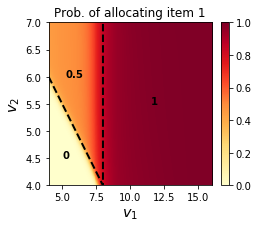

In [6]:
points = [(4, 6), (8, 4), (8, 7)]
x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))
        
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8,6))

plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
img = ax.imshow(alloc[::-1, :, 0], extent=[4,16,4,7], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd', aspect=4)
                    
plt.text(5, 4.5, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(5.25, 6, s='0.5', color='black', fontsize='10', fontweight='bold')
plt.text(11.5, 5.5, s='1', color='black', fontsize='10', fontweight='bold')

ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 1')
plt.colorbar(img, fraction=0.046, pad=0.04)
if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc1.pdf'), bbox_inches = 'tight', pad_inches = 0.05)

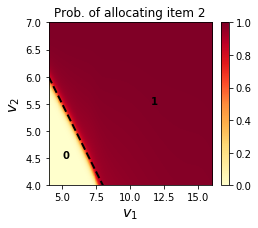

In [7]:
points = [(4, 6), (8, 4)]

x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))
        
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8,6))

plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
img = ax.imshow(alloc[::-1, :, 1], extent=[4,16,4,7], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd', aspect=4)
                    
plt.text(5, 4.5, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(11.5, 5.5, s='1', color='black', fontsize='10', fontweight='bold')

ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 2')
plt.colorbar(img, fraction=0.046, pad=0.04)
if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc2.pdf'), bbox_inches = 'tight', pad_inches = 0.05)